In [1]:
import numpy as np
from scipy.integrate import quad, odeint, solve_ivp
from scipy.special import kn
import matplotlib.pyplot as plt
import math
from numpy import cos, sin, pi

import lib.config as config

font = {'family':'serif', 'serif': ['computer modern roman']}
plt.rc('font',**font)
plt.rcParams['text.usetex'] = True

from importlib import reload

import lib.utils
import lib.Xsecs
import lib.cosmo_def

In [2]:
##############################
### Assign input variables ###
##############################

config.config_params['Lnu'] = 1e-0
config.config_params['Lchi'] = 3e-3
config.config_params['chi_flav'] = 1

config.config_params['m_nl1'] = 3e-8
config.config_params['m_nl2'] = 3e-8
config.config_params['m_nl3'] = 3e-8

config.config_params['mN1'] = 10
config.config_params['mN2'] = 10
config.config_params['mN3'] = 10

config.config_params['Mass_chi'] = 1e-9


Lnu = config.config_params['Lnu']
Lchi = config.config_params['Lchi']

m_nl1 = config.config_params['m_nl1']
m_nl2 = config.config_params['m_nl2']
m_nl3 = config.config_params['m_nl3']

mN1 = config.config_params['mN1']
mN2 = config.config_params['mN2']
mN3 = config.config_params['mN3']

Mass_chi = config.config_params['Mass_chi']

chi_flav = config.config_params['chi_flav']

In [3]:
sval_all = []
Xsec_chi_all = []
Xsec_phi_all = []

mass_list = np.array([1e-3, 1e-2, 1e-1, 1e-0])

for phival in mass_list:
    
    config.config_params['Mass_phi'] = phival
    Mass_phi = config.config_params['Mass_phi']

    reload(lib.utils)
    reload(lib.Xsecs)
    reload(lib.cosmo_def)
    
    from lib.utils import *
    from lib.Xsecs import *
    from lib.cosmo_def import *

    # Decay width of phi
    phi_decayW = decayWidth_phi(chi_flav, Lchi, Mass_phi)
    
    # G_eff of chi SI
    Geffchi = Geffchi(Lchi, Mass_phi)

    svals = np.sort(np.concatenate((np.logspace(np.log10(1e-10),np.log10(1e12),200),[Mass_phi**2])))
    
    Xchi = np.array([Xsec_flav(ii, Lnu, chi_flav, Lchi, Mass_phi, flav1 = 'e', flav2 = 'e') for ii in svals])
    Xphi = np.array([Xsec_viphi(ii, Lnu, Mass_phi, m_nl1, mN1, mN2, mN3, flav1 = 'e', flav2 = 'e') for ii in svals])

    sval_all.append(svals)
    Xsec_chi_all.append(Xchi)
    Xsec_phi_all.append(Xphi)

sval_all = np.array(sval_all)
Xsec_chi_all = np.array(Xsec_chi_all)
Xsec_phi_all = np.array(Xsec_phi_all)

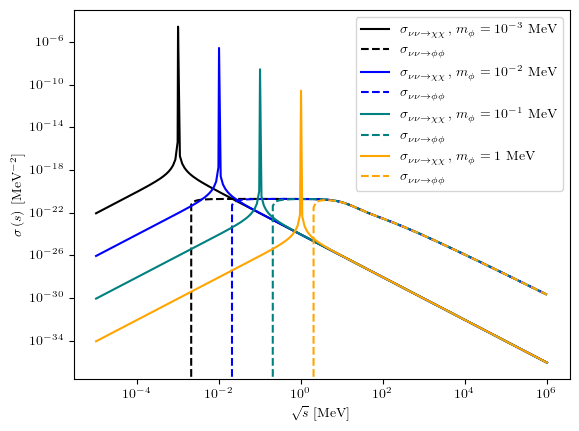

In [4]:
plt.plot(np.sqrt(sval_all[0]),Xsec_chi_all[0],'black', label = r"$\sigma_{\nu\nu\to\chi\chi}\,,\,m_\phi = 10^{-3}$ MeV")
plt.plot(np.sqrt(sval_all[0]),Xsec_phi_all[0],'black', ls='dashed', label = r"$\sigma_{\nu\nu\to\phi\phi}$")

plt.plot(np.sqrt(sval_all[1]),Xsec_chi_all[1],'blue', label = r"$\sigma_{\nu\nu\to\chi\chi}\,,\,m_\phi = 10^{-2}$ MeV")
plt.plot(np.sqrt(sval_all[1]),Xsec_phi_all[1],'blue', ls='dashed', label = r"$\sigma_{\nu\nu\to\phi\phi}$")

plt.plot(np.sqrt(sval_all[2]),Xsec_chi_all[2],'teal', label = r"$\sigma_{\nu\nu\to\chi\chi}\,,\,m_\phi = 10^{-1}$ MeV")
plt.plot(np.sqrt(sval_all[2]),Xsec_phi_all[2],'teal', ls='dashed', label = r"$\sigma_{\nu\nu\to\phi\phi}$")

plt.plot(np.sqrt(sval_all[3]),Xsec_chi_all[3],'orange', label = r"$\sigma_{\nu\nu\to\chi\chi}\,,\,m_\phi = 1$ MeV")
plt.plot(np.sqrt(sval_all[3]),Xsec_phi_all[3],'orange', ls='dashed', label = r"$\sigma_{\nu\nu\to\phi\phi}$")

plt.legend()
plt.ylabel(r'$\sigma\,(s)$ [MeV$^{-2}$]')
plt.xlabel(r'$\sqrt{s}$ [MeV]')
plt.yscale('log')
plt.xscale('log')

#plt.savefig("/Users/Tae/Desktop/N_effective/Type_I_variant/main_code/plots/Xsec_plot.pdf",bbox_inches = 'tight')

In [7]:
'''
print('SM neutrino-phi coupling = ',
      f"{Lnu*n_light_phi('1', '1'):.4}",', ',
      f"{Lnu*n_light_phi('2', '2'):.4}",', ',
      f"{Lnu*n_light_phi('3', '3'):.4}",'\n')

print('m tilde = ',
      f"{np.log10(Lnu*n_light_phi('1', '1')*mN1):.4}",'\n')

print('phi mass (MeV) = ',f"{Mass_phi:.4}")
print('phi decay width (MeV) = ', f"{phi_decayW:.3}",'\n')
print('decay width / mass = ', f"{phi_decayW/Mass_phi*100:.3} %",'\n')

print('cross section at mass pole : ',
      f"{Xsec_flav(Mass_phi**2, Lnu, chi_flav, Lchi, Mass_phi, flav1 = 'e', flav2 = 'e'):.4}", ', ',
      f"{Xsec_flav(Mass_phi**2, Lnu, chi_flav, Lchi, Mass_phi, flav1 = 'mu', flav2 = 'mu'):.4}",'\n')

print('Lambda phi chi = ',Lchi,'\n')

print('mass matrix of light neutrinos \n', mass_nlight,'\n')
print('PMNS matrix \n',U_PMNS.real,'\n')

print('Geff = ',Geffchi)
'''
print()